# Machine Learning - Assignment

## Project specification

The assignment consists of two parts, each one worth 50% of the total weight associated with the assignment.

- **First part of the project**

Implement the k-means algorithm using the Mahalanobis distance instead of the standard Euclidean distance. Then, create a toy dataset with 2 or 3 dimensions (so it is possible to easily visualize the data) with roughly 500 data points. Such a dataset should be designed so that it allows you to show how and when k-means operating with the Mahalanobis distance works better than k-means equipped with the Euclidean distance and a centroid-based cluster representative.
    
- **Second part of the project**

Implement the Davies-Bouldin index for cluster validation (intrinsic cluster validation). Then, perform model selection for finding the best partition order *k* of k-means. For this part of the project, use the standard k-means implementation operating with the Euclidean distance and centroids as cluster representatives. Perform simulations and comments on the results obtained on the dataset named "cluster_validation_data.txt" that has been provided with this notebook.

## Your project starts from here

In [26]:
%matplotlib inline

### Part 1 of the project...

In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt

def euclidean_distance(x, y):
 
    sum = 0
    counter = 0

    for i in range(len(x)):
        sum += (x[i] - y[i]) ** 2
        counter += 1
    average=sum/ counter

    return np.sqrt(average)
def points_within_circle(radius,center=(0,0),number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,))*2*np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y
class Euclidean_Kmeans:
    def __init__(self, cluster, itr=100):
        self.cluster = cluster
        self.itr = itr

    def fit(self, data):
 
        random.seed(60)
       
        self.centroids = {index: value for index, value in enumerate(random.sample(list(data), self.cluster))}

        for i in range(self.itr):

           
            self.partitions = {i: [] for i in range(self.cluster)}

            # Calculate the distance between the point and the  nearest centroid
            for point in data:
                distances = [euclidean_distance(point, self.centroids[centroid]) for centroid in self.centroids]
                self.partitions[distances.index(min(distances))].append(point)

            # Record distance centroids 
            old_centroids = dict(self.centroids)

            # update the centroids
            for cluster in self.partitions:
                self.centroids[cluster] = np.mean(self.partitions[cluster], axis=0)

            # compare the previous centroid with new one 
            compare_new_centroids = [np.allclose(self.centroids[centroid], old_centroids[centroid]) for centroid in
                                    self.centroids]

            if False not in compare_new_centroids :
                return self
                break

        return self

    def predict(self, dataset):

        self.labels = []
        for sample in dataset:
            distances = [euclidean_distance(sample, self.centroids[centroid]) for centroid in self.centroids]
            self.labels.append(distances.index(min(distances)))
        return self.labels


class Mahalanobis_Kmeans:
    def __init__(self, cluster, begin_itr=5, itr=100):
        self.cluster = cluster
        self.begin_itr =begin_itr
        self.itr = itr

    def Mahalanobis_distance(self, x, y, cov_inv):
        """
         Computes   Mahalanobis distance between vectors X and Y.
        """
        return np.sqrt(np.dot(np.dot(x - y, cov_inv), (x - y)))

    def fit(self, data):
        """
         Tarin the cluster model
        """
        random.seed(100)

        # random select initial centroids
        self.centroids = list(random.sample(list(data), 1))
        for i in range(self.cluster - 1):
            dist = np.array(
                [min([np.linalg.norm(sample - centroid) ** 2 for centroid in self.centroids]) for sample in data])
            index = np.random.choice(range(len(data)), p=(dist / dist.sum()))
            self.centroids.append(data[index])

        for i in range(self.begin_itr):

            self.partitions = {i: [] for i in range(self.cluster)}

            for sample in data:
                distances = [np.sqrt(euclidean_distance(sample, centroid)) for centroid in self.centroids]
                self.partitions[distances.index(min(distances))].append(sample)

            # update the centroids
            for cluster in self.partitions:
                self.centroids[cluster] = np.mean(self.partitions[cluster], axis=0)


        for i in range(self.itr):

            old_partitions = dict(self.partitions)

            self.partitions = {i: [] for i in range(self.cluster)}

            # assign points to a cluster given the smallest mahalanobis distance
            for point in data:
                d=old_partitions.values()
                distances = [self.Mahalanobis_distance(np.mean(cluster, axis=0), point,
                                                       np.linalg.inv(np.cov(cluster, rowvar=False))) for cluster in
                             old_partitions.values()]
                self.partitions[distances.index(min(distances))].append(point)

             # compare the previous cluster with new one 
            compare_new_cluster  = [np.allclose(np.mean(self.partitions[cluster]), np.mean(old_partitions[cluster])) for
                                   cluster in self.partitions]

            if False not in compare_new_cluster :
                return self
                break

        return self

    def predict(self, dataset):
        """
       Determine which cluster the point belong to

        """
        self.labels = []
        for sample in dataset:

            distances = [self.Mahalanobis_distance(np.mean(cluster, axis=0), sample,
         np.linalg.inv(np.cov(cluster, rowvar=False))) for cluster in self.partitions.values()]

            self.labels.append(distances.index(min(distances)))
        return self.labels


Text(0.5, 1.0, 'The Original')

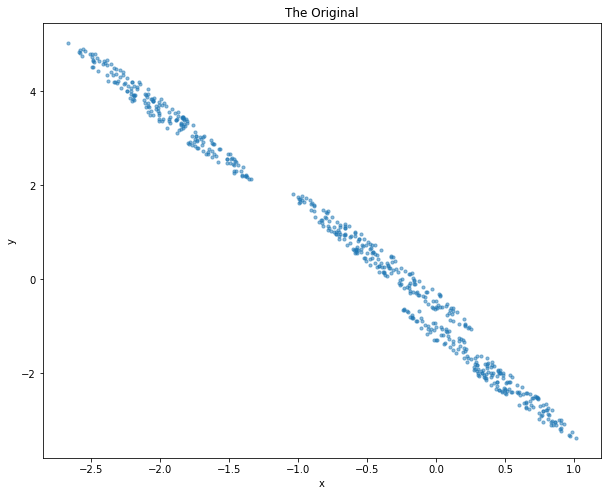

In [28]:
#create a toy dataset with  3 dimensions with 600 data points.
point1_x, point1_y = points_within_circle(1.5, (6, 2), 200)
point2_x, point2_y = points_within_circle(1.5, (2, 6), 200)
point3_x, point3_y=points_within_circle(1.5, (2, 2), 200)
x=np.concatenate((point1_x,point2_x),axis=0)
x=np.concatenate((x,point3_x),axis=0)
x=x.reshape(600,1)
y=np.concatenate((point1_y,point2_y),axis=0)
y=np.concatenate((y,point3_y),axis=0)
y=y.reshape(600,1)
x=np.concatenate((x,y),axis=1)
x = np.dot(x, [[0.2, -0.6], [-0.4, 0.8]])
X=x[:, 0]
Y=x[:, 1]
#plot data
plt.figure(figsize=(10,8))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, Y, marker='o', s=10, alpha=0.5);
plt.title("The Original")

Text(0.5, 1.0, 'Euclidean distance')

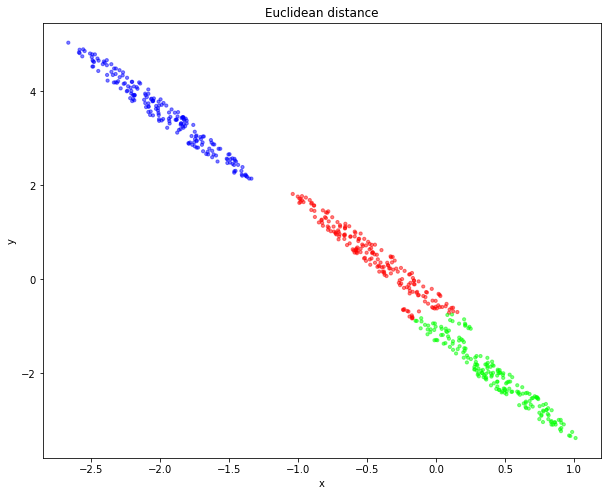

In [29]:
euclidean =Euclidean_Kmeans(3)
euclidean_kmeans = euclidean.fit(x).predict(x)  # assign each smaple to a cluster

#plot results
plt.figure(figsize=(10,8))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, Y, c=euclidean_kmeans, s=10, cmap='brg', alpha=0.5);
plt.title("Euclidean distance")

Text(0.5, 1.0, 'Mahalanobis distance')

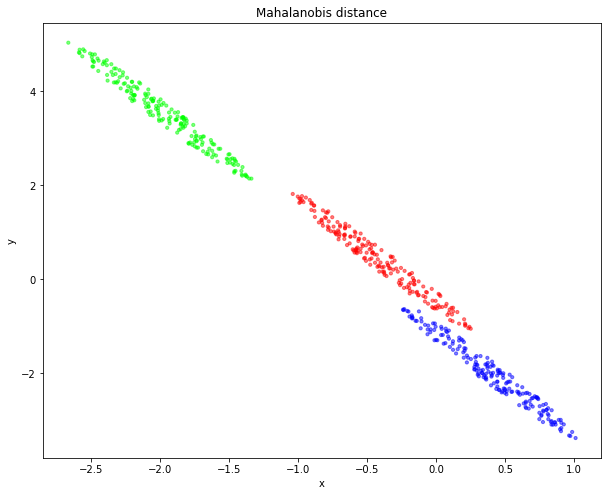

In [30]:
mahalanobis =Mahalanobis_Kmeans(3)
mahalanobis_kmeans = mahalanobis.fit(x).predict(x)

#plot results
plt.figure(figsize=(10,8))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X, Y, c=mahalanobis_kmeans, s=10, cmap='brg', alpha=0.5);
plt.title("Mahalanobis distance")

Analysis

Based on the following experimental results, K-Means operating with Mahalanobis distance works undoubtedly better than K-Means equipped with Euclidean distance and a centroid-based cluster representative for linearly correlated elliptical data

### Part 2 of the project...

In [31]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
validation_names = ["x", "y"]
validation_data = pd.read_csv("cluster_validation_data.txt", sep=",", names=validation_names)
df = pd.read_csv("cluster_validation_data.txt", sep=",",names=validation_names)

In [32]:
def readpd(data):
  
    columns = data.columns
    data_formatted = [[] for i in range(len(data))]
    for i in range(len(data)):
        for j in range(len(columns)):
            data_formatted[i].append(data[columns[j]][i])

    return data_formatted

def euclidean_distance(x, y):
   
   
    sum = 0
    counter = 0
    # Eucledian Distance
    for i in range(len(x)):
        sum += (x[i] - y[i]) ** 2
        counter += 1
    average=sum/ counter

    return np.sqrt(average)

def mean_distance(centroid, cluster):
    """
      calculate the mean distance away from the centroid
    """
    sum= 0
    for i in cluster:
        sum += euclidean_distance(centroid, i)
    acd=sum / len(cluster)
    return acd

def davies_bouldin(x, centroid_labels):
    """
       calculate the Davies Bouldin value of the clustering
    """
    data = readpd(x)

    centroids = []

    c= len(set(centroid_labels))
    clusters = [[] for i in range(c)]
    # create a list of lists of each element in each cluster
    for j in range(len(centroid_labels)):
        clusters[centroid_labels[j]].append(data[j])

    # calculate the centroids
    for i in clusters:
        centroids.append(np.average(i, axis=0).tolist())

    # calculate the average distances between the centroids and the clusters
    mean_distances = []
    for i in range(c):
        mean_distances.append(mean_distance(centroids[i], clusters[i]))

    # Find the distance between each center of gravity in the matrix 
    centroids_distance = []
    for i in range(c):
        centroid_distances = []
        for j in range(c):
            centroid_distances.append(euclidean_distance(centroids[i], centroids[j]))
        centroids_distance.append(centroid_distances)

    maxcd = []

    for i in range(c):
        cd = []
        for j in range(c):
            if i != j:
                cd.append((mean_distances[i] + mean_distances[j]) / centroids_distance[i][j])
        maxcd.append(max(cd))

    DaviesBouldin = sum(maxcd) * (1 / c)
    return DaviesBouldin



def plotting(data, namelabel):
    """
    """
    clusters = []
    values = []
    dd = np.array(readpd(df))
    for i in range(5):
        kmeans_euclidean =Euclidean_Kmeans(i+2)
        centroid_labels = kmeans_euclidean.fit(dd).predict(dd)
        values.append(davies_bouldin(data, centroid_labels))
        clusters.append(i + 2)
    plt.plot(clusters, values, label=namelabel)

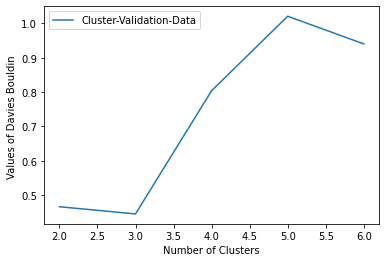

In [33]:
plotting(df, "Cluster-Validation-Data")
plt.xlabel("Number of Clusters")
plt.ylabel("Values of Davies Bouldin ")
plt.legend()



Analysis

The lower the davies bouldin value the better the cluster, and so from our graph we can conclude that data set: the best number of partitions of k were 3